In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#loading all necessary libraries
import numpy as np
import pandas as pd

import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [5]:
# Loading the dataset
df=pd.read_csv('C:/Users/oi00326/Downloads/Reviews.csv')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


#### This project would ensure you have an interactive exeperience 

In [7]:
# determining the shape of the dataset 
print(' This is the shape of the dataset', df.shape)

 This is the shape of the dataset (568454, 10)


### This shows the dataset has a 568,454 rows and 10 columns

##### Exploring the dataset a litte further using the exploratory data analysis

In [11]:
# check the first five rows
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [16]:
#checking the first five columns
df.iloc[:,6:9]

,Score,Time,Summary
0,5,1303862400,Good Quality Dog Food
1,1,1346976000,Not as Advertised
2,4,1219017600,"""Delight"" says it all"
3,2,1307923200,Cough Medicine
4,5,1350777600,Great taffy
...,...,...,...
568449,5,1299628800,Will not do without
568450,2,1331251200,disappointed
568451,5,1329782400,Perfect for our maltipoo
568452,5,1331596800,Favorite Training and reward treat


#### We dont want to include null values hence we use isnull function


In [19]:
# removing null values
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

### Profile name has 16 null values and Summary has 27 null values

In [23]:
#### Building a word cloud for total positive score reviews
product_score= df[df.Score ==5 ]
print('Total positive score is:',product_score.shape)

Total positive score is: (363122, 10)


### Building the word cloud and converting to a lower case


In [30]:
Reviews= product_score['Summary'].str.lower()
Reviews.head()

0                            good quality dog food
4                                      great taffy
6    great!  just as good as the expensive brands!
7                           wonderful, tasty taffy
8                                       yay barley
Name: Summary, dtype: object

#### Removing puntuation marks

In [43]:
Total_Reviews = Reviews.str.split(' ')
Total_Reviews.head()

0                           [good, quality, dog, food]
4                                       [great, taffy]
6    [great!, , just, as, good, as, the, expensive,...
7                           [wonderful,, tasty, taffy]
8                                        [yay, barley]
Name: Summary, dtype: object

In [40]:
import string

Cleaned_Total_Reviews = []
for review in Total_Reviews:
    cleaned_review = [x.strip(string.punctuation) for x in review]
    Cleaned_Total_Reviews.append(cleaned_review)

review_summary = [" ".join(review) for review in Cleaned_Total_Reviews]
Total_summary = "\n".join(review_summary)

print(Total_summary[:500])


good quality dog food
great taffy
great  just as good as the expensive brands
wonderful tasty taffy
yay barley
healthy dog food
the best hot sauce in the world
my cats love this diet food better than their regular food
strawberry twizzlers  yummy
lots of twizzlers just what you expect
love it
great sweet candy
home delivered twizlers
always fresh
twizzlers
delicious product
twizzlers
please sell these in mexico
twizzlers  strawberry
yummy
the best hot sauce in the world
great machine
this is my 


### Exploring the word cloud library

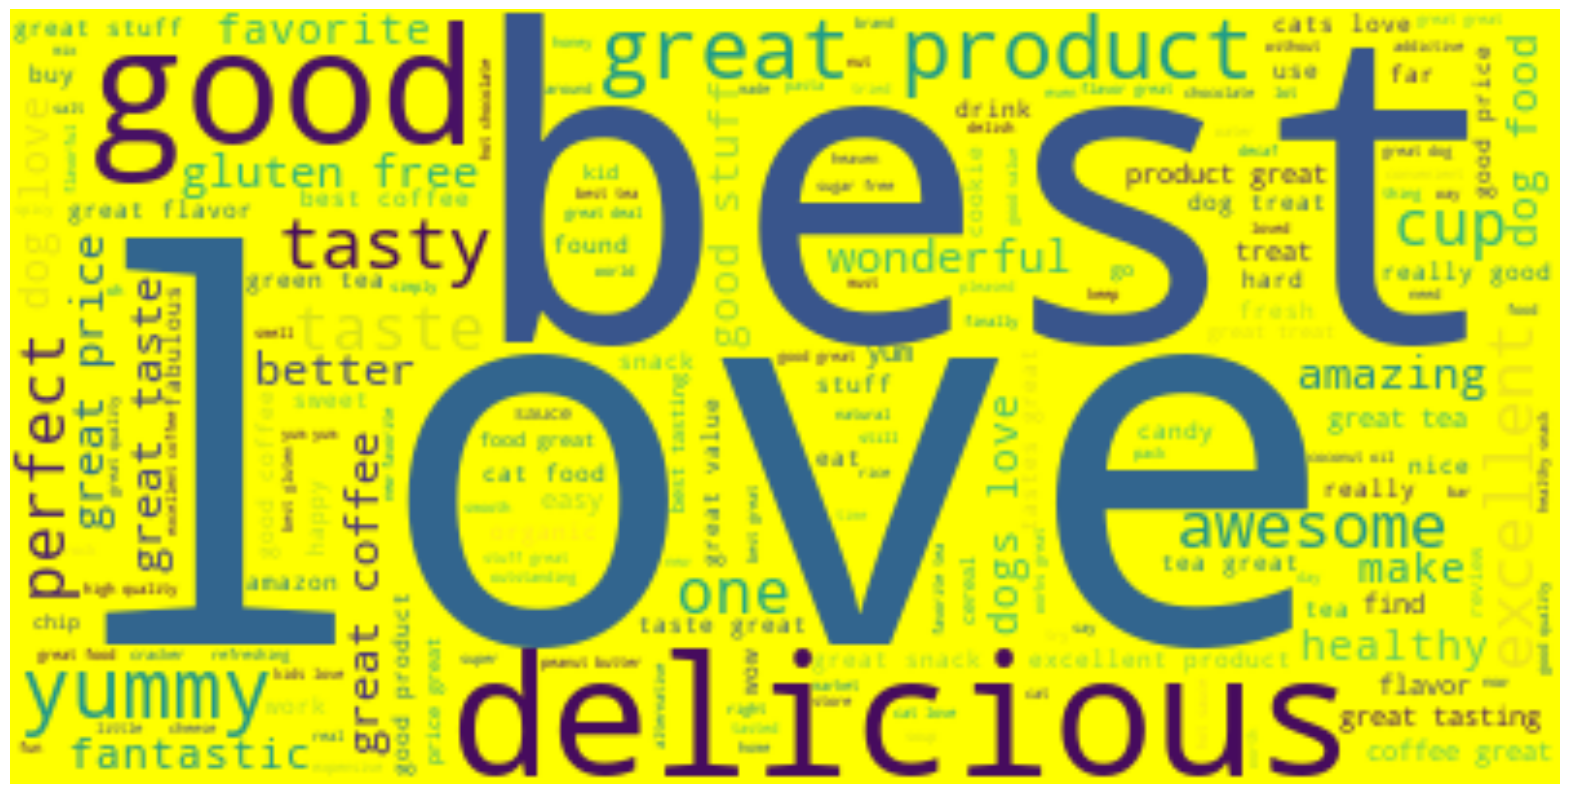

In [42]:
wordcloud_reviews = WordCloud (background_color = 'yellow').generate(Total_summary)
#Lines length
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_reviews, interpolation = 'bilinear')
plt.axis('off')
plt.show()

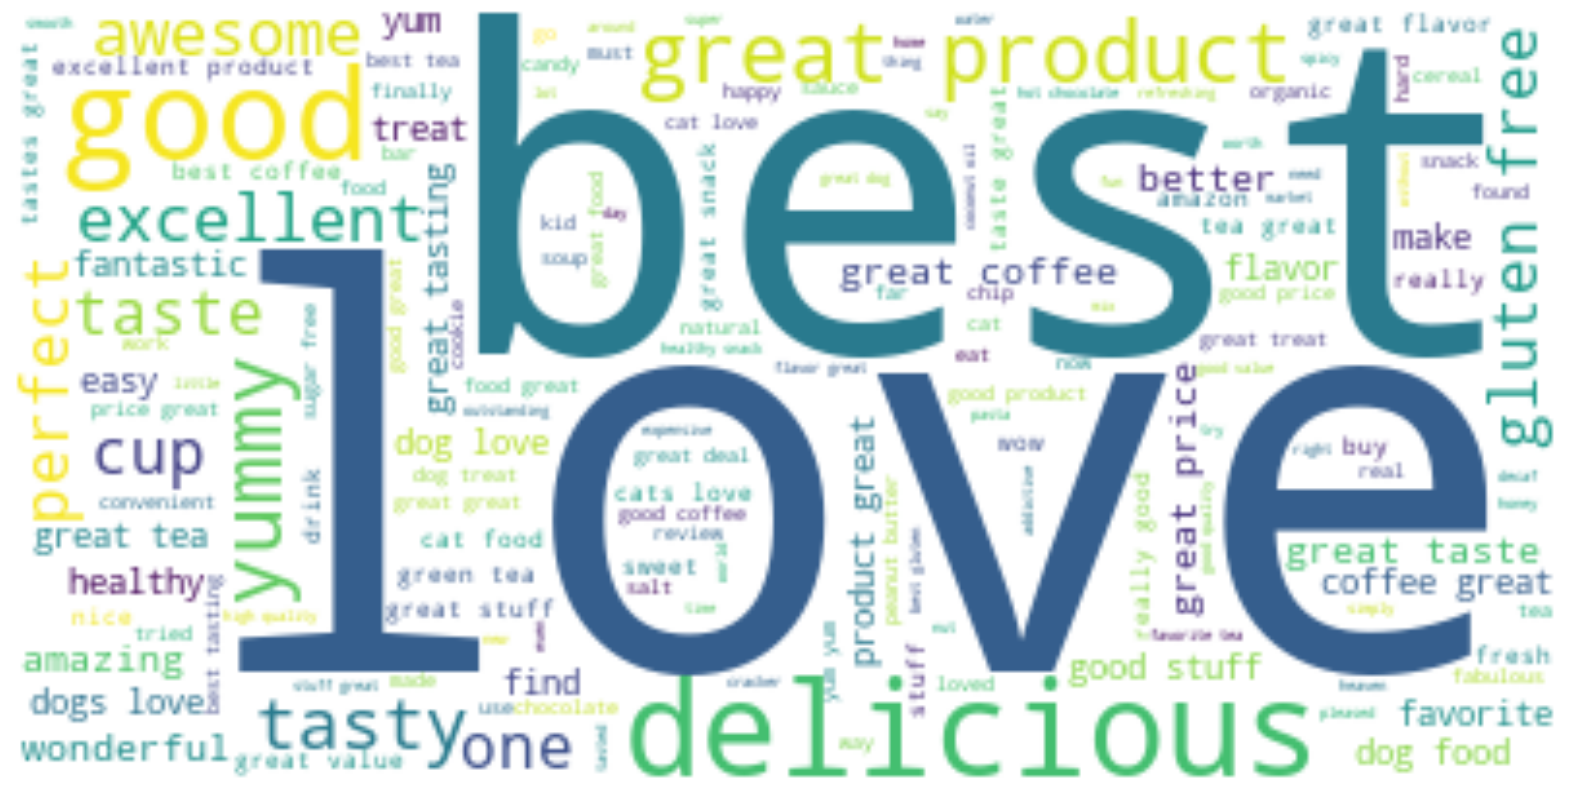

In [44]:
wordcloud_reviews = WordCloud (background_color = 'white').generate(Total_summary)
#Lines length
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_reviews, interpolation = 'bilinear')
plt.axis('off')
plt.show()

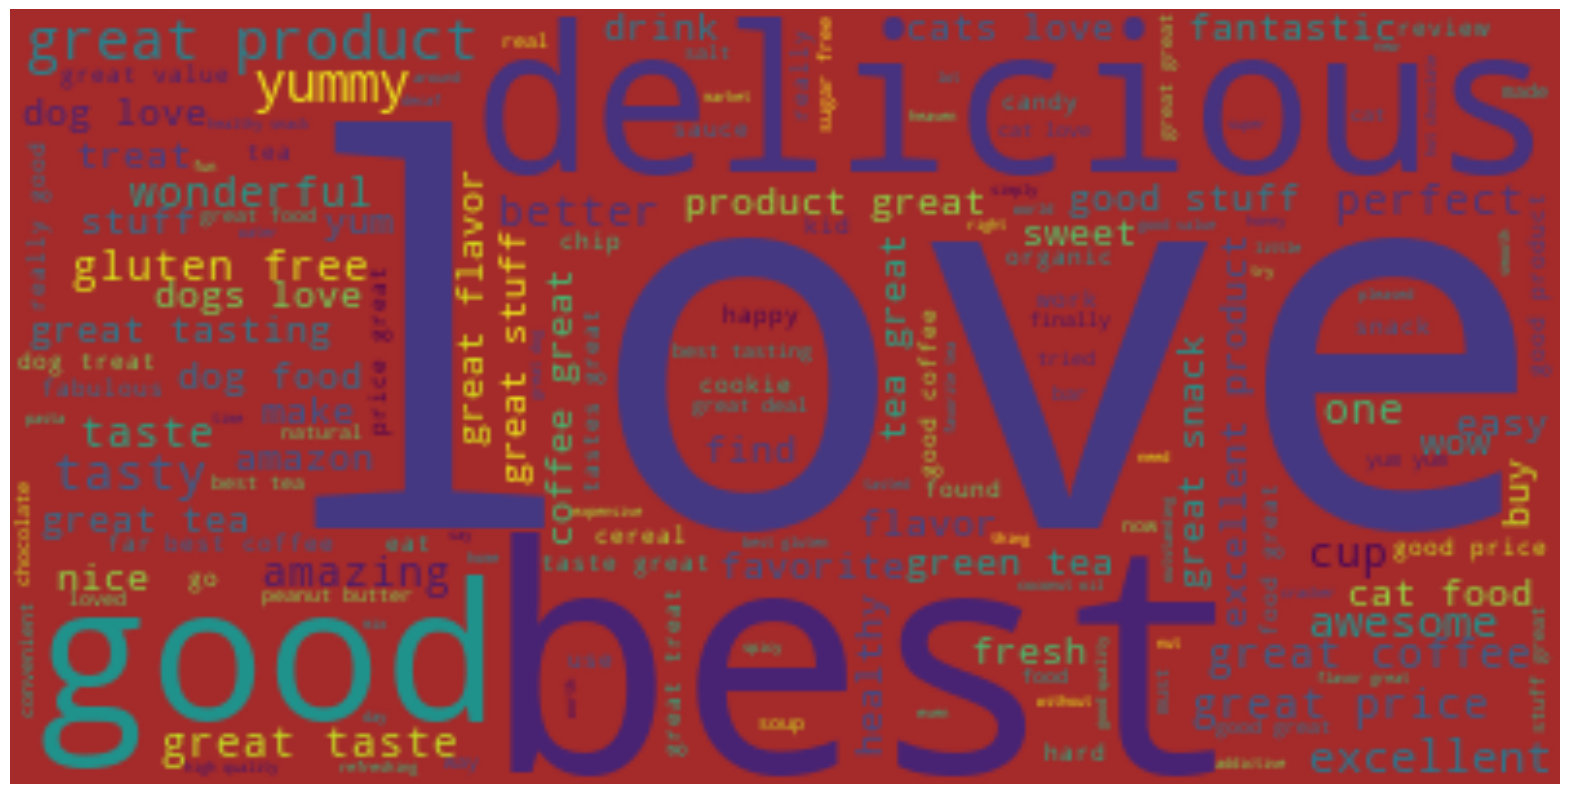

In [46]:
wordcloud_reviews = WordCloud (background_color = 'brown').generate(Total_summary)
#Lines length
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_reviews, interpolation = 'bilinear')
plt.axis('off')
plt.show()